In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import re

In [2]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Валентина\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Валентина\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Валентина\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Валентина\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Валентина\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

True

### Import texts and normalization

In [8]:
import csv

with open('./speeches.csv', newline='') as f:
    reader = csv.reader(f)
    data_frame = list(reader)

for i in data_frame:
    i.remove(i[0])

In [9]:
print(data_frame)

[['John Quincy Adams\t1825-03-04\tIn compliance with an usage coeval with the existence of our Federal Constitution, and sanctioned by the example of my predecessors in the career upon which I am about to enter, I appear, my fellow-citizens, in your presence and in that of Heaven to bind myself by the solemnities of religious obligation to the faithful performance of the duties allotted to me in the station to which I have been called In unfolding to my countrymen the principles by which I shall be governed in the fulfillment of those duties my first resort will be to that Constitution which I shall swear to the best of my ability to preserve, protect, and defend. That revered instrument enumerates the powers and prescribes the duties of the Executive Magistrate, and in its first words declares the purposes to which these and the whole action of the Government instituted by it should be invariably and sacredly devoted--to form a more perfect union, establish justice, insure domestic tr

In [10]:
def cleaning(text):
    text = re.sub('#\S+', '', text)
    text = re.sub('@\S+', '', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)       # remove punctuations
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    text = re.sub('[^a-zA-Z]', ' ', text) # removing the numeric values
    text = text.lower() # settings all words to lower case
    return text

In [11]:
text_list = []
for t in data_frame:
    text_list.append(t[0].split('\t'))
print(text_list[0])

['John Quincy Adams', '1825-03-04', 'In compliance with an usage coeval with the existence of our Federal Constitution, and sanctioned by the example of my predecessors in the career upon which I am about to enter, I appear, my fellow-citizens, in your presence and in that of Heaven to bind myself by the solemnities of religious obligation to the faithful performance of the duties allotted to me in the station to which I have been called In unfolding to my countrymen the principles by which I shall be governed in the fulfillment of those duties my first resort will be to that Constitution which I shall swear to the best of my ability to preserve, protect, and defend. That revered instrument enumerates the powers and prescribes the duties of the Executive Magistrate, and in its first words declares the purposes to which these and the whole action of the Government instituted by it should be invariably and sacredly devoted--to form a more perfect union, establish justice, insure domestic

In [12]:
only_standardized_texts = []
for t in text_list:
    only_standardized_texts.append(cleaning(t[2]))
print(only_standardized_texts)

['in compliance with an usage coeval with the existence of our federal constitution and sanctioned by the example of my predecessors in the career upon which i am about to enter i appear my fellowcitizens in your presence and in that of heaven to bind myself by the solemnities of religious obligation to the faithful performance of the duties allotted to me in the station to which i have been called in unfolding to my countrymen the principles by which i shall be governed in the fulfillment of those duties my first resort will be to that constitution which i shall swear to the best of my ability to preserve protect and defend that revered instrument enumerates the powers and prescribes the duties of the executive magistrate and in its first words declares the purposes to which these and the whole action of the government instituted by it should be invariably and sacredly devotedto form a more perfect union establish justice insure domestic tranquillity provide for the common defense pro

### Tokenization

In [13]:
tokens = []
for t in only_standardized_texts:
    tokens.append(word_tokenize(t))
print(len(tokens))

50


In [14]:
print(tokens)

[['in', 'compliance', 'with', 'an', 'usage', 'coeval', 'with', 'the', 'existence', 'of', 'our', 'federal', 'constitution', 'and', 'sanctioned', 'by', 'the', 'example', 'of', 'my', 'predecessors', 'in', 'the', 'career', 'upon', 'which', 'i', 'am', 'about', 'to', 'enter', 'i', 'appear', 'my', 'fellowcitizens', 'in', 'your', 'presence', 'and', 'in', 'that', 'of', 'heaven', 'to', 'bind', 'myself', 'by', 'the', 'solemnities', 'of', 'religious', 'obligation', 'to', 'the', 'faithful', 'performance', 'of', 'the', 'duties', 'allotted', 'to', 'me', 'in', 'the', 'station', 'to', 'which', 'i', 'have', 'been', 'called', 'in', 'unfolding', 'to', 'my', 'countrymen', 'the', 'principles', 'by', 'which', 'i', 'shall', 'be', 'governed', 'in', 'the', 'fulfillment', 'of', 'those', 'duties', 'my', 'first', 'resort', 'will', 'be', 'to', 'that', 'constitution', 'which', 'i', 'shall', 'swear', 'to', 'the', 'best', 'of', 'my', 'ability', 'to', 'preserve', 'protect', 'and', 'defend', 'that', 'revered', 'instrume

### Removing stopwords

In [15]:
stop_words = set(stopwords.words('english'))

clean_texts = []
count = 0
for speech in tokens:
    clean_texts.append([])
    for w in speech:
        if w not in stop_words:
            clean_texts[count].append(w)
    if count==50:
        break
    count+=1

In [16]:
print(clean_texts)

[['compliance', 'usage', 'coeval', 'existence', 'federal', 'constitution', 'sanctioned', 'example', 'predecessors', 'career', 'upon', 'enter', 'appear', 'fellowcitizens', 'presence', 'heaven', 'bind', 'solemnities', 'religious', 'obligation', 'faithful', 'performance', 'duties', 'allotted', 'station', 'called', 'unfolding', 'countrymen', 'principles', 'shall', 'governed', 'fulfillment', 'duties', 'first', 'resort', 'constitution', 'shall', 'swear', 'best', 'ability', 'preserve', 'protect', 'defend', 'revered', 'instrument', 'enumerates', 'powers', 'prescribes', 'duties', 'executive', 'magistrate', 'first', 'words', 'declares', 'purposes', 'whole', 'action', 'government', 'instituted', 'invariably', 'sacredly', 'devotedto', 'form', 'perfect', 'union', 'establish', 'justice', 'insure', 'domestic', 'tranquillity', 'provide', 'common', 'defense', 'promote', 'general', 'welfare', 'secure', 'blessings', 'liberty', 'people', 'union', 'successive', 'generations', 'since', 'adoption', 'social',

### Stemming

In [17]:
# snowball = SnowballStemmer('english')
# lancaster = LancasterStemmer()
# porter = PorterStemmer()

# for stemmer in (snowball, lancaster, porter):


### Lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

In [19]:
n = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag[1].startswith('J'):
        return wordnet.ADJ
    elif treebank_tag[1].startswith('V'):
        return wordnet.VERB
    elif treebank_tag[1].startswith('N'):
        return wordnet.NOUN
    elif treebank_tag[1].startswith('R'):
        return wordnet.ADV
    else:
        return "n"

lem_word = []
count = 0
for tokens_set in clean_texts:
    lem_word.append([])
    for w in pos_tag(tokens_set):
        lemm = n.lemmatize(w[0],get_wordnet_pos(w))
        lem_word[count].append(lemm)
    if count==50:
        break
    count+=1

In [20]:
print(lem_word)

[['compliance', 'usage', 'coeval', 'existence', 'federal', 'constitution', 'sanction', 'example', 'predecessor', 'career', 'upon', 'enter', 'appear', 'fellowcitizens', 'presence', 'heaven', 'bind', 'solemnity', 'religious', 'obligation', 'faithful', 'performance', 'duty', 'allot', 'station', 'call', 'unfolding', 'countryman', 'principle', 'shall', 'govern', 'fulfillment', 'duty', 'first', 'resort', 'constitution', 'shall', 'swear', 'best', 'ability', 'preserve', 'protect', 'defend', 'revere', 'instrument', 'enumerate', 'power', 'prescribes', 'duty', 'executive', 'magistrate', 'first', 'word', 'declare', 'purpose', 'whole', 'action', 'government', 'institute', 'invariably', 'sacredly', 'devotedto', 'form', 'perfect', 'union', 'establish', 'justice', 'insure', 'domestic', 'tranquillity', 'provide', 'common', 'defense', 'promote', 'general', 'welfare', 'secure', 'bless', 'liberty', 'people', 'union', 'successive', 'generation', 'since', 'adoption', 'social', 'compact', 'one', 'generation'

## Jaccard Index

In [21]:
def jac(x: set, y: set):
    shared = set(x).intersection(set(y))  # selects shared tokens only
    return len(shared) / len(set(x).union(set(y)))  # union adds both sets together

## Correlation matrix

In [22]:
import numpy

def correlation_matrix(lems_list):
    matrix = []
    for i in range(len(lems_list)):
        matrix.append([])
        for j in range(len(lems_list)):
            jac_index = jac(lems_list[i], lems_list[j])
            matrix[i].append(jac_index)
    return matrix

def plotting(correlation_matrix):
    print(numpy.matrix(correlation_matrix))

matrix = correlation_matrix(lem_word)
plotting(matrix)

[[1.         0.18226121 0.16683417 ... 0.14446228 0.24024961 0.23384831]
 [0.18226121 1.         0.18250377 ... 0.10887949 0.19980218 0.18150685]
 [0.16683417 0.18250377 1.         ... 0.12528217 0.17987805 0.16695958]
 ...
 [0.14446228 0.10887949 0.12528217 ... 1.         0.1408     0.14275466]
 [0.24024961 0.19980218 0.17987805 ... 0.1408     1.         0.30826508]
 [0.23384831 0.18150685 0.16695958 ... 0.14275466 0.30826508 1.        ]]


## Heatmap

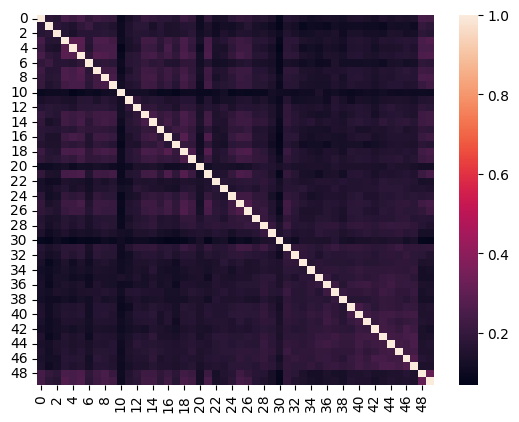

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
def heatmap(correlation_matrix):
    sns.heatmap(matrix)
    plt.show()

heatmap(matrix)

In [24]:
# The maximum percentage of similarity.

print(text_list[48][0:2], text_list[49][0:2]) # since counting starts from 0

['James Monroe', '1817-03-04'] ['James Monroe', '1821-03-04']


In [25]:
# The minimum percentage of similarity.

print(text_list[4][0:2], text_list[30][0:2]) # since counting starts from 0

['William Henry Harrison', '1841-03-04'] ['Franklin D. Roosevelt', '1/20/1945']
